(chapter3_part2)=

# Cost Function

- This is a supplement material for the [Machine Learning Simplified](https://themlsbook.com) book. It sheds light on Python implementations of the topics discussed while all detailed explanations can be found in the book. 
- I also assume you know Python syntax and how it works. If you don't, I highly recommend you to take a break and get introduced to the language before going forward with my code. 
- This material can be downloaded as a Jupyter notebook (Download button in the upper-right corner -> `.ipynb`) to reproduce the code and play around with it. 

In the [previous section](https://code.themlsbook.com/book/chapter3/linear_regression) we explored how to fit a linear regression onto your dataset, as well as how to quantify its "goodness of fit" in python. 

In this section, we will go further and explore how to build a Cost Function in python.

Let's recall our hypothetical dataset of six apartments located in the center of Amsterdam along with their prices (in 10,000 EUR) and floor areas (in square meters).

| area ($m^2$) | price (in €10,000) |
| ----------- | ----------- |
| 30 | 31 | 
| 46 | 30 |
| 60 | 80 |
| 65 | 49 |
| 77 | 70 |
| 95 | 118 |


## 1. Required Libraries & Data

Before we start, we need to import few libraries that we will use in this jupyterbook.

In [1]:
import matplotlib.pyplot as plt #to build graphs
import numpy as np #to work with numbers
%config InlineBackend.figure_format = 'retina' #to make sharper and prettier plots

Next step is to re-create our hypothetical dataset that we've been working with.

In [2]:
x = np.array([[30], [46], [60], [65], [77], [95]])
y = np.array([31, 30, 80, 49, 70, 118])

## 2. SSR

<!-- ### 2.1. Try out several values for a coefficient $a$ -->

In [the previous section](https://code.themlsbook.com/book/chapter3/linear_regression) we trained a linear regression function and obtained "true" function $f(x) = 1.3x - 18$. Now let's pretend that we know the parameter $b=-18$, but the parameter $a$ is unknown to us. This leaves us with $\hat{f}(x) = a · x − 18$, a function of a single parameter $a$. Let’s take random values of $a$ and evaluate the SSR for each.

In [3]:
#produce 21 values of a in range between -1 and 4
a_range = np.linspace(-2,4.5,13)

print(f'Different SSR values will be calculated for the following parameters \n {a_range}')

Different SSR values will be calculated for the following parameters 
 [-2.         -1.45833333 -0.91666667 -0.375       0.16666667  0.70833333
  1.25        1.79166667  2.33333333  2.875       3.41666667  3.95833333
  4.5       ]


In [4]:
ssr_range = []

#for each a value in a_range
for a in a_range:
    y_pred = []
    r_range = []

    #calculate all the predicted values
    for i in x:
        y_pred.append(-18 + a*i)

    #calculate all the residuals
    for i in range(0, len(x)):
        r_range.append((y[i]-y_pred[i])**2)

    #save ssr value to a list
    ssr_range.append(np.sum(r_range))

    #print ssr value
    print(f'when a = {a}, SSR = {np.sum(r_range)}')

when a = -2.0, SSR = 282654.0
when a = -1.4583333333333335, SSR = 197923.40798611112
when a = -0.9166666666666667, SSR = 128329.46527777778
when a = -0.375, SSR = 73872.171875
when a = 0.16666666666666652, SSR = 34551.52777777779
when a = 0.708333333333333, SSR = 10367.53298611112
when a = 1.25, SSR = 1320.1875
when a = 1.7916666666666665, SSR = 7409.491319444441
when a = 2.333333333333333, SSR = 28635.444444444427
when a = 2.875, SSR = 64998.046875
when a = 3.416666666666666, SSR = 116497.29861111105
when a = 3.958333333333333, SSR = 183133.19965277772
when a = 4.5, SSR = 264905.75


Now, let's plot a nice graph and see those regressions with their corresponding SSR values:

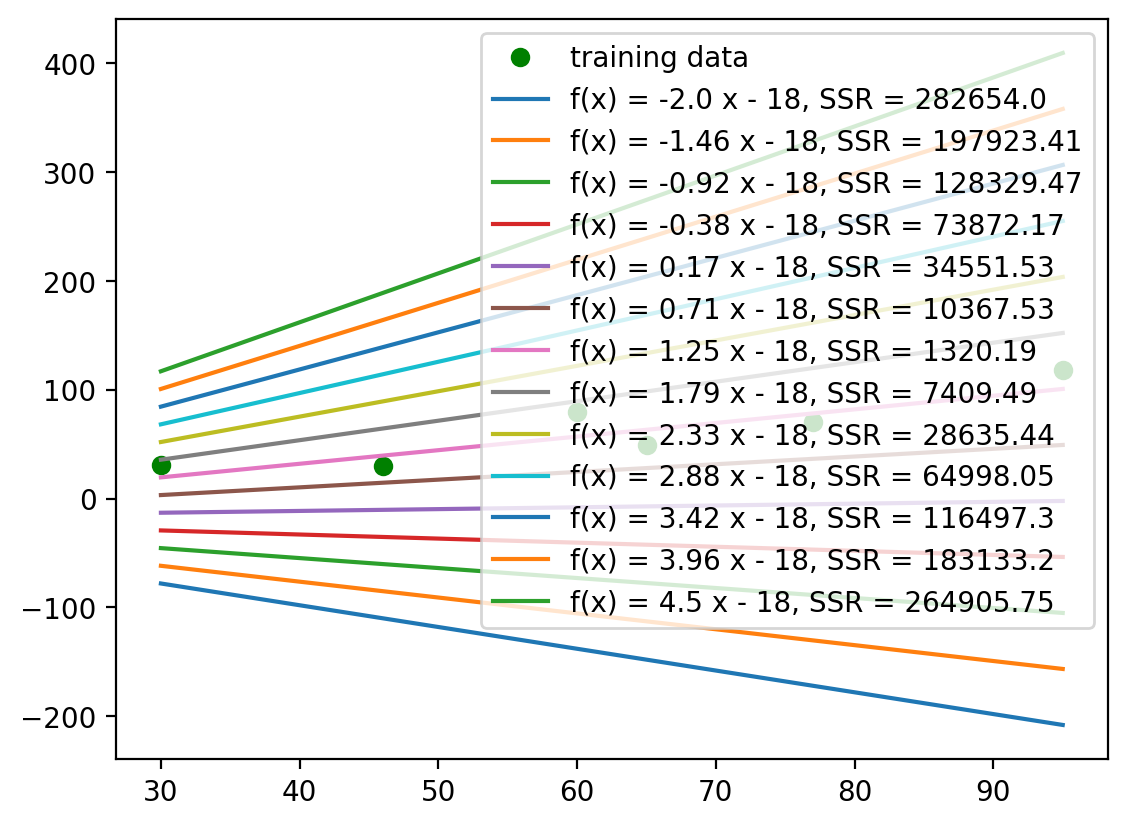

In [5]:
#define the graph
fig, ax = plt.subplots()

#plotting training data
ax.plot(x,y, 'o', color='g', label='training data')

#simple loop to plot each regression
for i in range(len(a_range)):
    ax.plot(x, -18 + a_range[i]*x, label=f'f(x) = {round(a_range[i],2)} x - 18, SSR = {round(ssr_range[i],2)}')

#show legend
plt.legend();

### 2.2. Build Cost Function


Now, let’s plot calculated $SSR(a)$ values over a changing parameter $a$ on the graph, where the x-axis is an $a$ value and the y-axis is the value of the SSR, (as shown in Figure 3.6a in the [MLS](https://themlsbook.com) book)

In [6]:
# Defined Cost Function J

def J(a0, a1, x, y, m):
    J = 0
    for i in range(m):
        J += ((a0 + a1*x[i]) - y[i] )**2
    return J

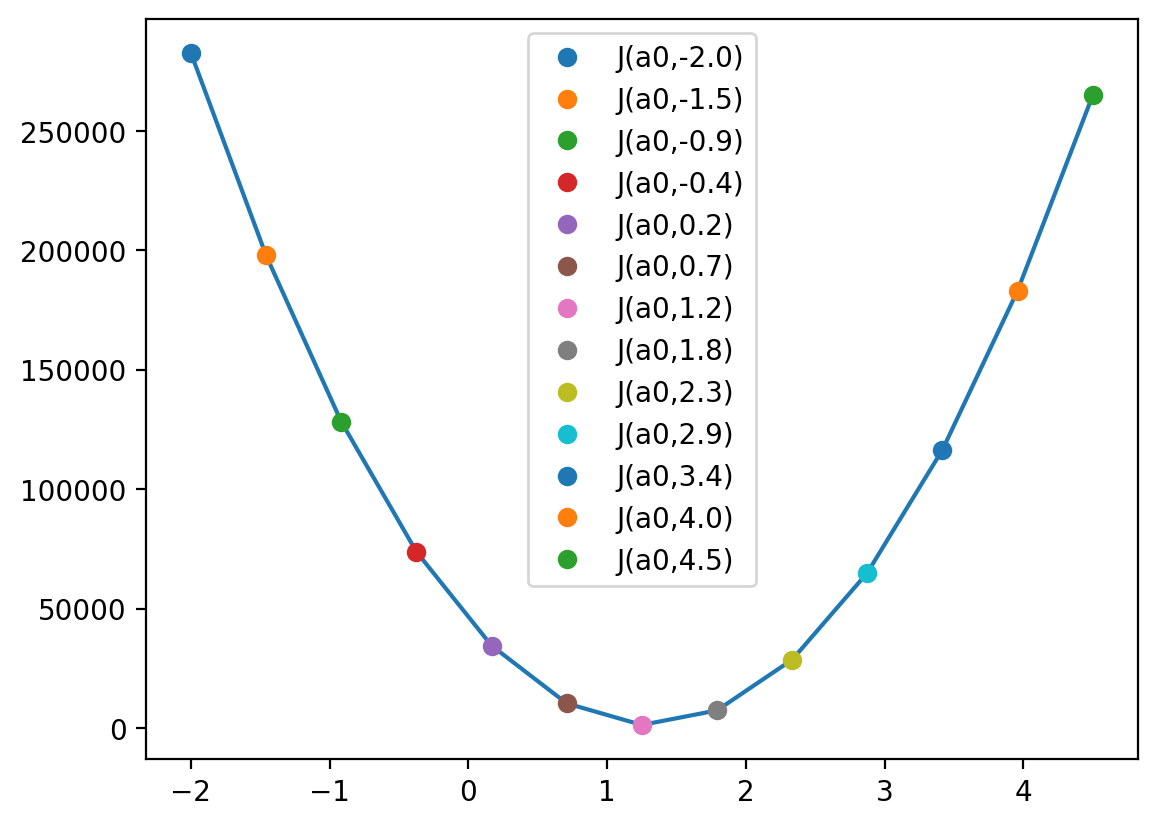

In [7]:
# Plotting 2-D Cost Function for coefficient

fig, ax = plt.subplots()

ax.plot(a_range, J(-18,a_range,x,y,m=len(x)), c='C0')

for a in a_range:
    ax.plot(a, J(-18,a,x,y,m=len(x)), 'o', label='J(a0,%.1f)' %a)
plt.legend();

This is how a cost function $SSR(a)$ or $J(a)$ looks like. We can also plot a cost function of two parameters $a$ and $b$, $SSR(a,b)$:

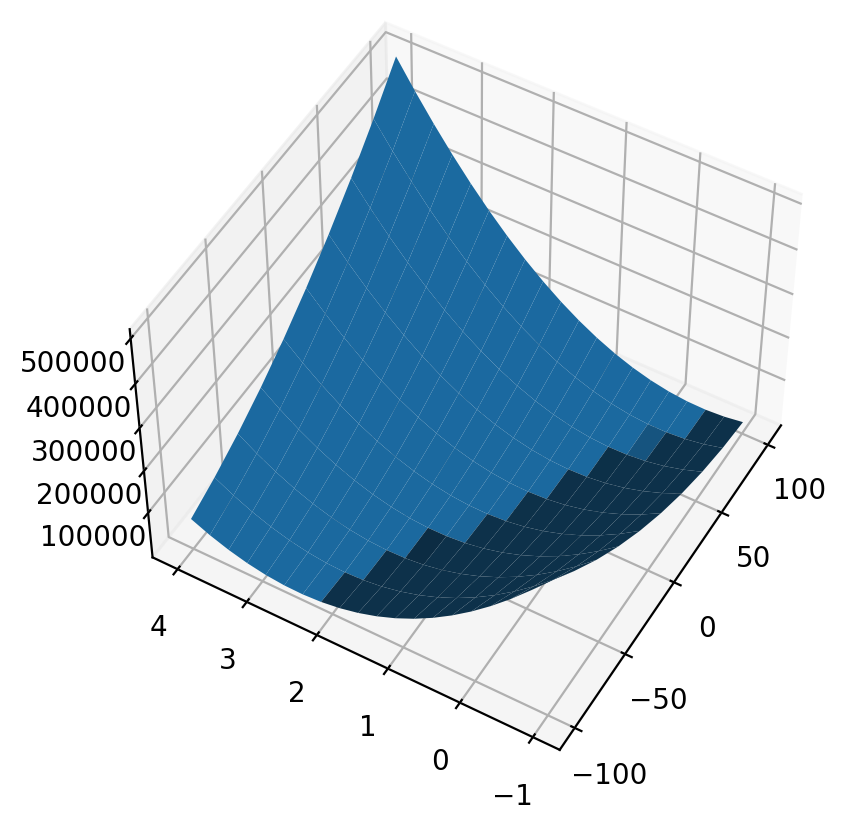

In [8]:
# Plotting Cost Function for coefficient and intercept 

from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
a0 = np.linspace(-100,100,10)
a1 = np.linspace(-1,4,20)
aa0, aa1 = np.meshgrid(a0, a1)
ax.plot_surface(aa0, aa1, J(aa0,aa1,x,y,m=len(x)))
ax.view_init(50,-150)